Image Data
- 기존에는 이미지를 잘라서 쭉 나열함.(펼침) > 펼치다보니까 모델이 이 이미지를 입체적으로 보지 못함
- convolution layer .. 커널..피쳐맵.. >> 입체적으로 보게 됨(피쳐개수가 늘수록 더 입체적으로 봄)
- 결국은 펼쳐주긴 해야 됨 >> flatten layer
- 결과 보여줄때, 분류할때는 softmax activation function(output layer에서는 이거) / hidden layer에서는 ReLu

Convolution Neural Network
- 층, layer가 깊어질수록 더 많은 정보, 고급 정보
- 필터가 많아지면 많아질수록 디테일을 잘 살림
- 깊이가 깊어질수록 데이터들을 잘 조합함
- convolution kernel이 이동하며 일치하는 곳을 찾음! (convolution연산)
- stride(step같은거!) > 1이면 한칸씩 감
- CNN에서 여러 종류의 커널이 알아서 만들어짐!(필터 안에 있는 값들도 자동으로 정해진다! 알아서 필터를 찾음!)
- 남이 weight가지고 있는걸 가지고 와서 쓰면.. 속도 빠름.. !!!!!!(이거 계산하는데 많은 곱셈.. 연산 하니까..이걸줄여주니까.. 이미 만들어진 모델 쓰면 속도 확 줄음!)

Affine = fully connected layer

Padding
- 연산횟수가 늘어남. 가장자리 정보가 덜 소실됨! padding을 활용해서 가장자리 정보를 더 소싨킨다!


- 필터의 개수 = 채널!(3x3x10 >> 10) / 3x3은 window size..

Max Pooling >> 가장 많은 정보를 담아 압축한다!(가장 큰값!)
- average pooling도 있는데 max pooling을 제일 많이씀 >> 이미지에서는 맥스를 많이 씀! (색이 가장 강한거.. 그게 가장 특성을 잘 드러내니까!)

Dropout
- 의도적으로 덜 학습시킴 >> 모델의 과적합 방지!(일부 빼고 계산)

In [ ]:
# 딥러닝에서는 tensorflow!
# mnist라는 데이터 불러와서 쓸거임!

In [2]:
import tensorflow as tf

data = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = data.load_data()

print(X_train.shape) # (60000, 28, 28) >> 흑백이미지 60000개가 28x28 로 있음!(뒤에 1이 생략됐으니까 흑백임.)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


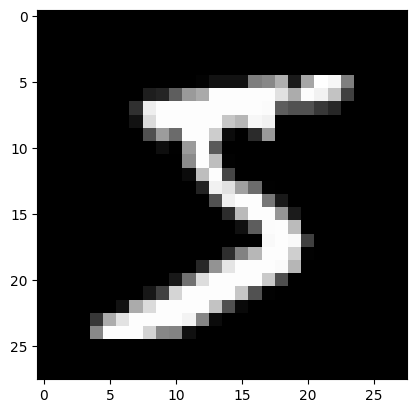

In [5]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))

In [6]:
y_train # 숫자를 맞춰봐야겠다.. >> 숫자가 몇까지있는지를 봐야해! >> 클래스가 몇개인지 궁금해해야 함!

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
import numpy as np
np.unique(y_train) # 클래스가 10개임

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## 데이터 전처리

In [10]:
# 정규화 해주려고 ( scaling하는것처럼)
X_train = X_train / 255.0
X_test = X_test / 255.0

# 01. None CNN Model
- fully connected layer로 된 모델을 만들어보자!

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# 이미지를 convolution쓰지 않고 하려면 어떻게 해야 할까 >> flatten
model = Sequential()
model.add(Flatten(input_shape=(28,28))) # 28x28이 한줄로 펼쳐짐(2차원>1차원으로!)
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 이미지를 분류해야 해! > softmax (확률이 나옴 > 제일큰게 그 속성이니까 그거다) / linear은 숫자 하나 나옴.. 분류x 이게 뭔지도 모름ex.83..이게 뭔지모름 // 클래스가 10개니까 10!

In [12]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy']) # 다중분류고 target이 integer니까 SPC

In [13]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2122 - accuracy: 0.9363
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0892 - accuracy: 0.9723
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0639 - accuracy: 0.9803
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0497 - accuracy: 0.9841
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0405 - accuracy: 0.9868


In [14]:
# 모델 평가
model.evaluate(X_test, y_test) # [loss, accuracy] > 위에서 loss = 'sparse_categorical_crossentropy', metrics=['accuracy'] 이렇게 지정해줘서 이렇게 나오는 거임!

313/313 [==============================] - 0s 802us/step - loss: 0.0883 - accuracy: 0.9739


[0.08832821249961853, 0.9739000201225281]

In [15]:
# 예측
result = model.predict(X_test)

313/313 [==============================] - 0s 699us/step


In [16]:
X_test.shape # result의 shape은?  (10000, 10) >> layer를 잘 이해할거임!(softmax 확률 10개가 나오는거임! 결과는!)

(10000, 28, 28)

In [17]:
result.shape

(10000, 10)

In [18]:
sample = result[0]
sample # 제일 높은 값을 찾으면!! 이게 시각화하면 결과 나옴..

array([2.88690044e-11, 7.24744211e-08, 4.52450664e-08, 9.75690909e-06,
       2.61861359e-08, 3.16874460e-09, 1.08469796e-11, 9.99981642e-01,
       8.98226418e-08, 8.20010155e-06], dtype=float32)

7
7
AxesImage(size=(28, 28))


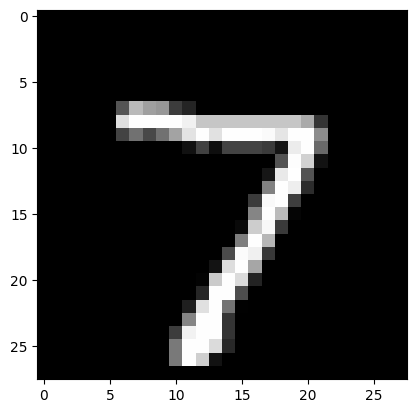

In [23]:
print(np.argmax(sample)) # 제일 큰값의 인덱스값을 반환 > 예측 결과의 인덱스
print(y_test[0]) # 실제
print(plt.imshow(X_test[0], cmap=plt.get_cmap('gray'))) # 실제

In [ ]:
# 정확도
# 0.9868 (train)
# 0.9739000201225281 (test)

In [ ]:
# 이렇게 하면 숫자를 분류할 수 있는 모델을 만든거임!

# 02. Flatten Dropout Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3165 - accuracy: 0.9065
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1434 - accuracy: 0.9596
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1154 - accuracy: 0.9668
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0944 - accuracy: 0.9724
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0815 - accuracy: 0.9758


In [ ]:
# 정확도 좀 줄었음 >> 의도적으로 정보를 좀 소실 시켰으니까

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 795us/step - loss: 0.0844 - accuracy: 0.9755


[0.08435099571943283, 0.9754999876022339]

In [ ]:
# Flatten 정확도
# 0.9868 (train)
# 0.9739000201225281 (test)

# Flatten(Dropout) 정확도 >> train, test gap 이 많이 줄었음.. 근데 이경우에는 dropout 안한게 나은듯
# 0.9758 (train)
# 0.9754999876022339 (test)

# 03. CNN Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1))) # (3,3)필터사이즈, (28,28,1)3차원 >> conv layer층이 하나 만들어진거임
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten()) # flatten한 이후에는 dense!(conv2d아님)
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [29]:
model.summary() # 이거 보고 compile 하기!! 적절한지 보고오오!!

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [28]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1182 - accuracy: 0.9639
Epoch 2/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0399 - accuracy: 0.9876
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0275 - accuracy: 0.9913
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0192 - accuracy: 0.9940
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0148 - accuracy: 0.9953


In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0360 - accuracy: 0.9896


[0.035985466092824936, 0.9896000027656555]

In [ ]:
# Flatten 정확도
# 0.9868 (train)
# 0.9739 (test)

# Flatten(Dropout) 정확도 >> train, test gap 이 많이 줄었음.. 근데 이경우에는 dropout 안한게 나은듯
# 0.9758 (train)
# 0.9755 (test)

# CNN
# 0.9953 (train)
# 0.9896 (test)
# CNN에서 dropou하면 더 좋을수도 있지만 이미 너무 좋아서 굳이..안해도 될듯!

Image Classification
- LeNet
- AlexNet: 구글에서 만듦 (이렇게 했더니 성능이 또 괜찮더라)
- VGG16: 채널 수가 2배씩 증가하게끔.. 변수가 많다...

Data Augmentationi
- 오버피팅을 방지하고 데이터를 늘릴 수 있는 방법

## 복습
- layer가 깊으면 깊을수록 고급정보(더 많은 정보)를 가진다.
- 여기서부터는 코랩으로.. GPU필요!
- CNN: 어떤 필터가 컨벌루션 연산이 되서.. >> 원본 이미지에서 공간을 이해하는 것!
- 255에 가까울수록 밝다(컬러는 3개 채널, 그레이(흑백)은 1개 채널)
- Affine은 Dense층(완전연결계층 - 3차원을 1차원으로 flatten해야되서 정보 손실이O..데이터 형상이 무너져서.).. 비슷..(얜 Relu) / 마지막엔 (softmax)
- CNN에서는 Affine이 conv층(이미지 형상 무너지지x), pooling이 추가됨

- Padding: 가장장리 연산의 정보를 덜 버리게 한다(외관 데이터를 0으로 채움)
- Stride = step
- 3차원 합성곱 연산: 입력의 채널 수와 필터의 채널 수 같아야 한다
- Max Pooling: 공간을 압축한다!(정보를 합충한다, 가로세로 방향의 공간을 줄이는 연산) >> 합성곱연산이 아닌 가장 높은 값! 최대풀링으로 값을 채움!(가장 두드러진 선, 색을 뽑아냄)(이미지에서는 최대풀링이 좋다!)
- Dropout: 오버피팅 방지, 의도적으로 일부 데이터를 제외시켜 학습시킴(다른 모델 쓸 때도 많이 씀)
- cnn vs dropout(오버피팅방지) vs flatten(정보소실): flatten보다 cnn이 공간 이해 잘하고, cnn보다 dropout이 오버피팅방지하니까 결과가 좀 더 좋을듯!

## 복습
- 이미 성능이 좋다하는 모델의 구조, 모델 활용(코드, 개발 공유하는 문화 잘 되어있음 >> 오픈소스(검색을 잘해야된다..) >> layer를 구성할때 이런걸 잘 참고하면서 만드는게 굿!(층을 얼마나 쌓고, 깊게할건지..)
- data augmentation: 오버피팅을 방지하고 데이터를 늘릴수있는 방법(원본이미지 각도, 색 바꾸기 등)(다양한 상황, 관점, 시점의 데이터를 넣어줌!)